# Dataframe Description:

 The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label

The task is to make a model that can consider the data provided and predict the Average Price.

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("avocado.csv")

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Lets drop Unnamed: 

In [17]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

# Exploratory Data Analysis (EDA):

In [18]:
#checking shape of data
df.shape

(18249, 13)

In [19]:
#checking dtypes
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [21]:
#checking for nul values
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

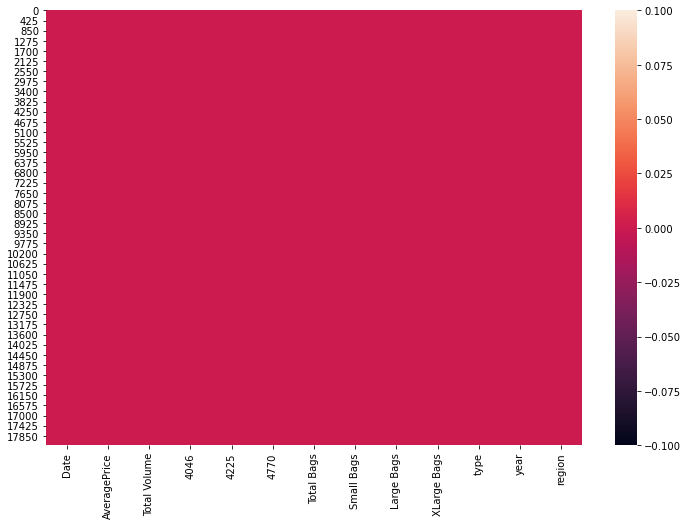

In [22]:
#visualize null value
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())
plt.show()

## NO null values present in Dataset

In [23]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [28]:
#checking for unique vales
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [31]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


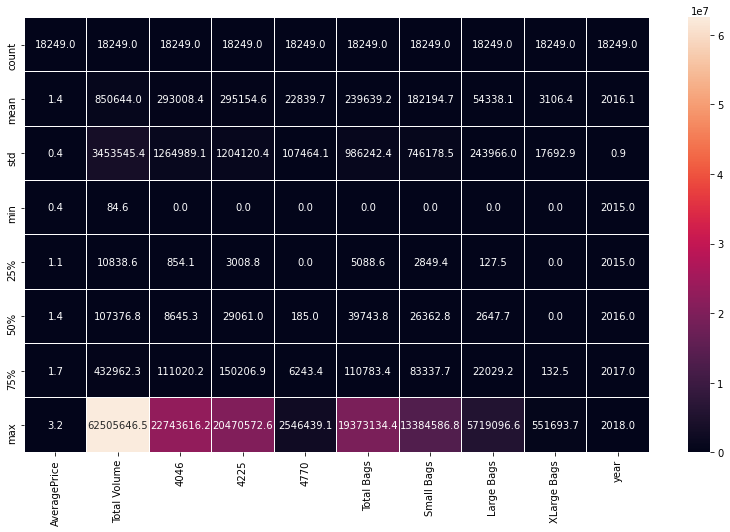

In [32]:
#visualize 
plt.figure(figsize=(14,8))
sns.heatmap(df.describe(),linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

# Now for target variable:

In [33]:
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [34]:
df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
2.91      1
2.68      1
3.04      1
3.17      1
3.03      1
Name: AveragePrice, Length: 259, dtype: int64

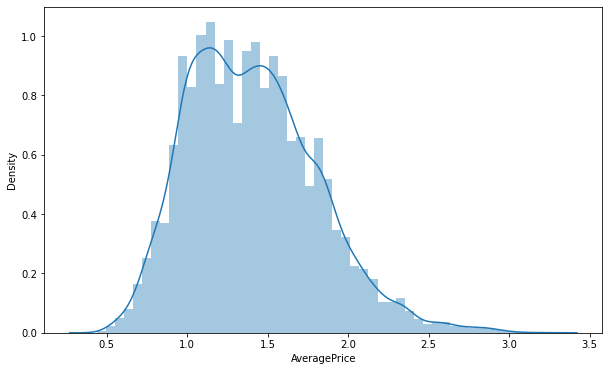

In [39]:
#visualize 
plt.figure(figsize=(10,6))
sns.distplot(df['AveragePrice'])
plt.show()

### It has Continuous distribution

# Now for features variable

In [40]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

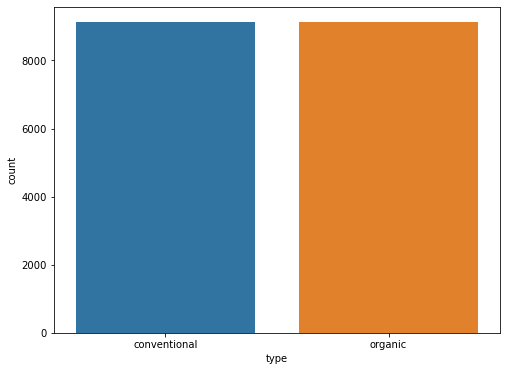

In [43]:
#visualize 
plt.figure(figsize=(8,6))
sns.countplot(df['type'])
plt.show()

##### Nearly equal numbers of conventional and organic avocados were produced.

In [45]:
df['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

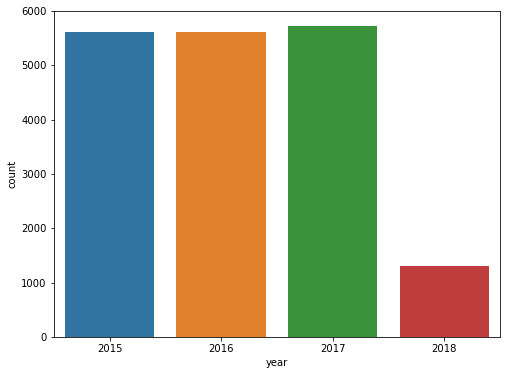

In [46]:
#visualize 
plt.figure(figsize=(8,6))
sns.countplot(df['year'])
plt.show()

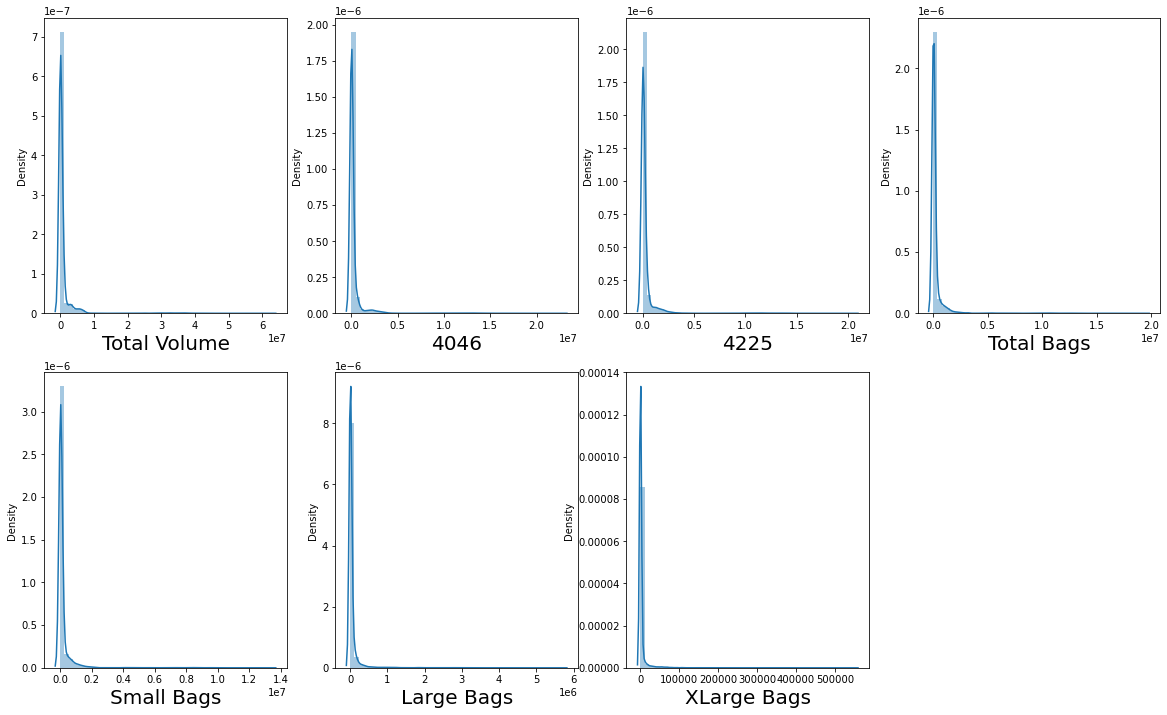

In [47]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in df[['Total Volume','4046','4225','Total Bags','Small Bags','Large Bags','XLarge Bags']]:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

##### Total Bags, Large Bags,Small Bags and, XLarge Bags columns have skewed data distribution

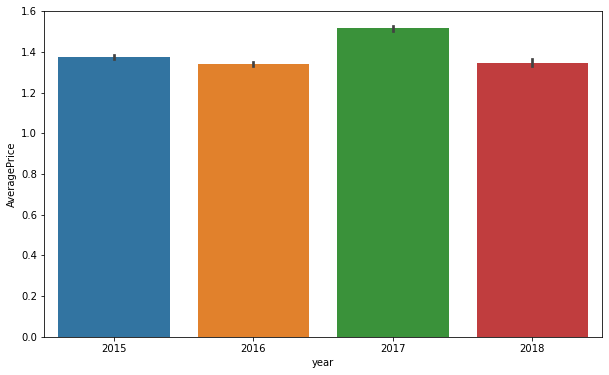

In [51]:
plt.figure(figsize=(10,6))
x = df['year']
y = df['AveragePrice']
sns.barplot(x,y)
plt.xlabel('year')
plt.ylabel('AveragePrice')
plt.show()

### Relationship between 'Date' and 'AveragePrice'

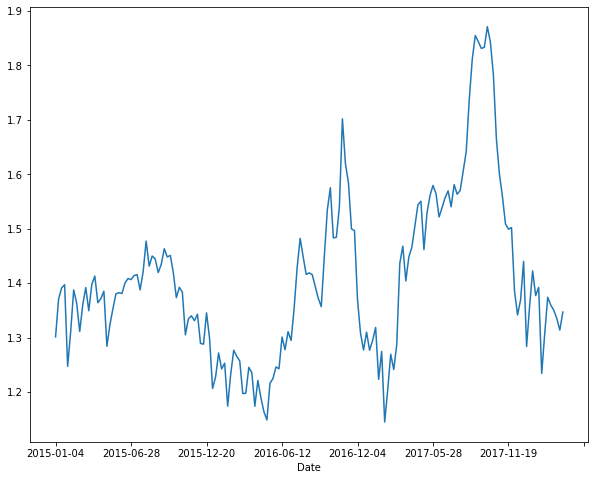

In [60]:
plt.figure(figsize=(10,8))
df.groupby('Date').mean()['AveragePrice'].plot()
plt.show()

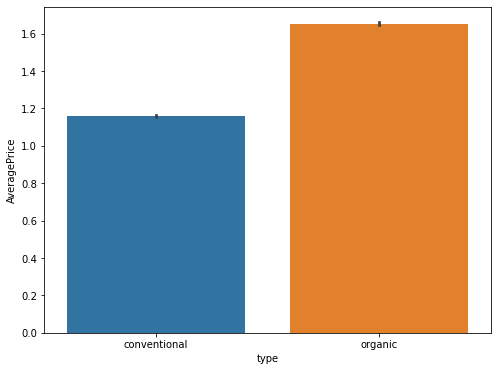

In [61]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'type', y = 'AveragePrice', data =df )
plt.show()

##### Average price of 'Organic' produce is higher than that of 'conventional' produce.

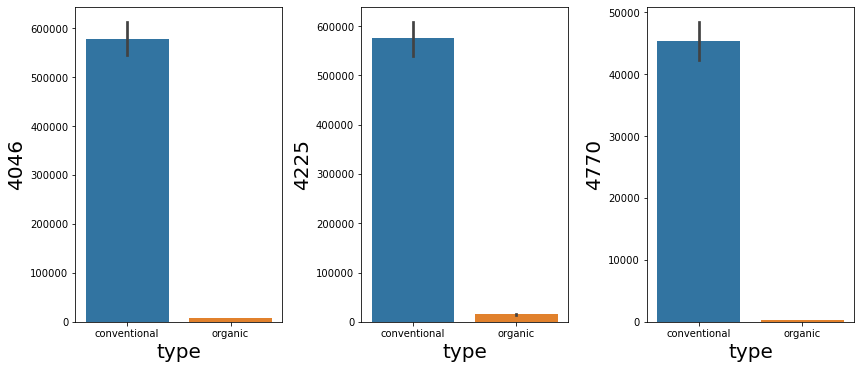

In [65]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = df[['4046','4225','4770']]
X = df['type']
for col in y:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(X,y[col])
        plt.xlabel('type',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

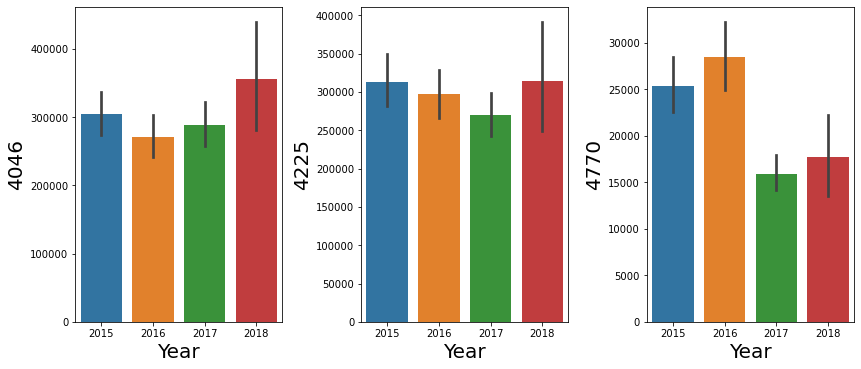

In [66]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = df[['4046','4225','4770']]
X = df['year']
for col in y:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(X,y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

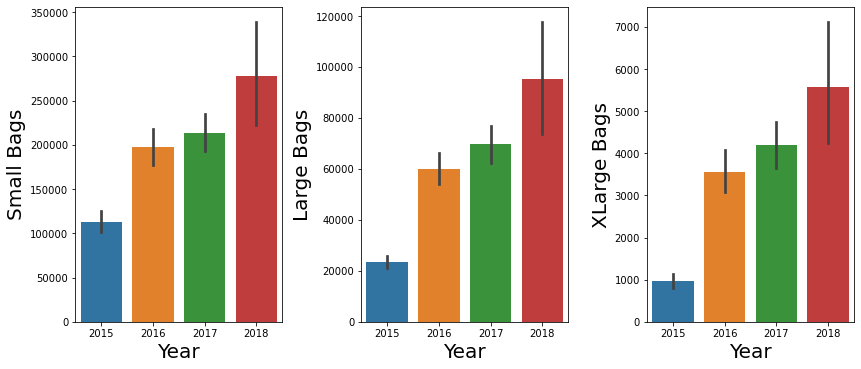

In [67]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = df[['Small Bags','Large Bags','XLarge Bags']]
X = df['year']
for col in y:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(X,y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

##### Creating 'Day' and 'Month' columns from 'Date' Columnn

In [68]:
df['Date']=pd.to_datetime(df['Date'])

In [70]:
df['Day']=df['Date'].apply(lambda d:d.day)

In [71]:
df['Month']=df['Date'].apply(lambda m:m.month)

In [72]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11


### Dropping 'Date' column
### Column 'Total Volume' is '4046'+'4225'+'4770'+'Total Bags'. Therefore dropping it as it is a highly dependent Feature.
### Column 'Total Bags' is 'Small Bags' + 'Large Bags ' + 'XLarge Bags'. Therefore dropping it as it is a highly dependent Feature.

In [73]:
df.drop(columns = ['Date','Total Volume','Total Bags' ],inplace = True)

In [74]:
df

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1


# Checking for Outliers

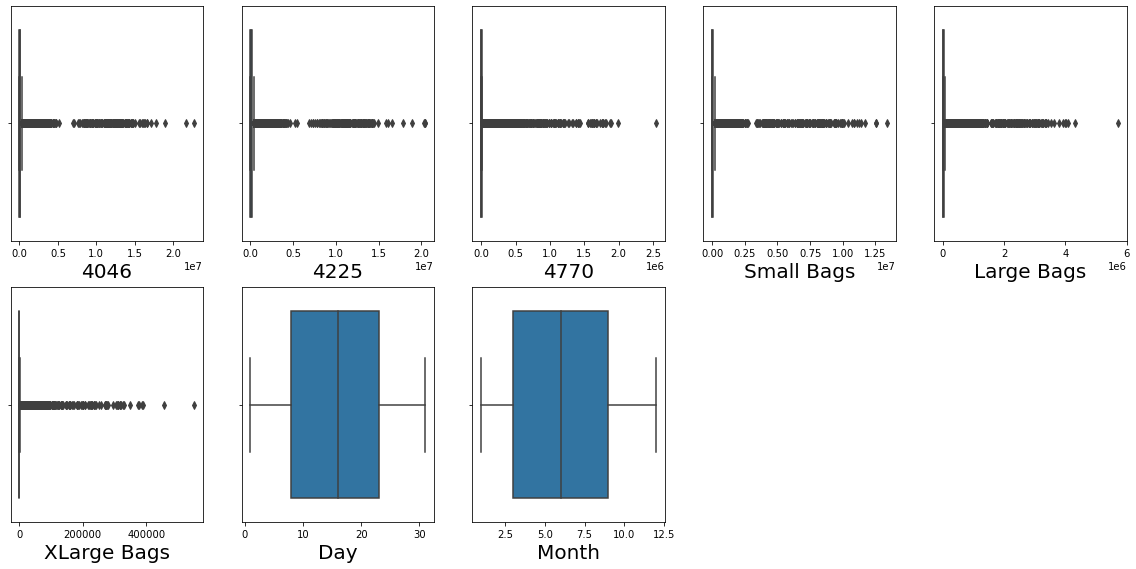

In [75]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in df.drop(columns = ['year','type','region','AveragePrice'],axis=1):
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

# Removing outliers using zscore method

In [76]:
DF =df.drop(columns = ['year','type','region','AveragePrice'],axis=1).copy()

In [77]:
DF

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,Day,Month
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,27,12
1,674.28,44638.81,58.33,9408.07,97.49,0.0,20,12
2,794.70,109149.67,130.50,8042.21,103.14,0.0,13,12
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,6,12
4,941.48,43838.39,75.78,5986.26,197.69,0.0,29,11
...,...,...,...,...,...,...,...,...
18244,2046.96,1529.20,0.00,13066.82,431.85,0.0,4,2
18245,1191.70,3431.50,0.00,8940.04,324.80,0.0,28,1
18246,1191.92,2452.79,727.94,9351.80,42.31,0.0,21,1
18247,1527.63,2981.04,727.01,10919.54,50.00,0.0,14,1


In [78]:
from scipy.stats import zscore

In [80]:
Z = zscore(DF)
z_score_abs = np.abs(Z)

In [81]:
DF1 = DF[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [86]:
DF1

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,Day,Month
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,27,12
1,674.28,44638.81,58.33,9408.07,97.49,0.0,20,12
2,794.70,109149.67,130.50,8042.21,103.14,0.0,13,12
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,6,12
4,941.48,43838.39,75.78,5986.26,197.69,0.0,29,11
...,...,...,...,...,...,...,...,...
18244,2046.96,1529.20,0.00,13066.82,431.85,0.0,4,2
18245,1191.70,3431.50,0.00,8940.04,324.80,0.0,28,1
18246,1191.92,2452.79,727.94,9351.80,42.31,0.0,21,1
18247,1527.63,2981.04,727.01,10919.54,50.00,0.0,14,1


In [87]:
DF1.shape

(17782, 8)

In [88]:
DF.shape

(18249, 8)

# Percentage of DataLoss

In [89]:
Data_loss =(18249-17782)/18249 * 100
Data_loss

2.55904433119623

### Percentage of DataLoss is 2.55% , which is acceptable

In [90]:
dropindx = df.index.difference(DF1.index)

In [91]:
dropindx

Int64Index([ 346,  359,  780,  781,  783,  787,  788,  790,  791,  792,
            ...
            9104, 9105, 9106, 9107, 9108, 9109, 9110, 9111, 9112, 9113],
           dtype='int64', length=467)

In [92]:
df.drop(dropindx,inplace = True)

In [93]:
df

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1


In [94]:
#restart
df.reset_index(drop=True,inplace = True) 

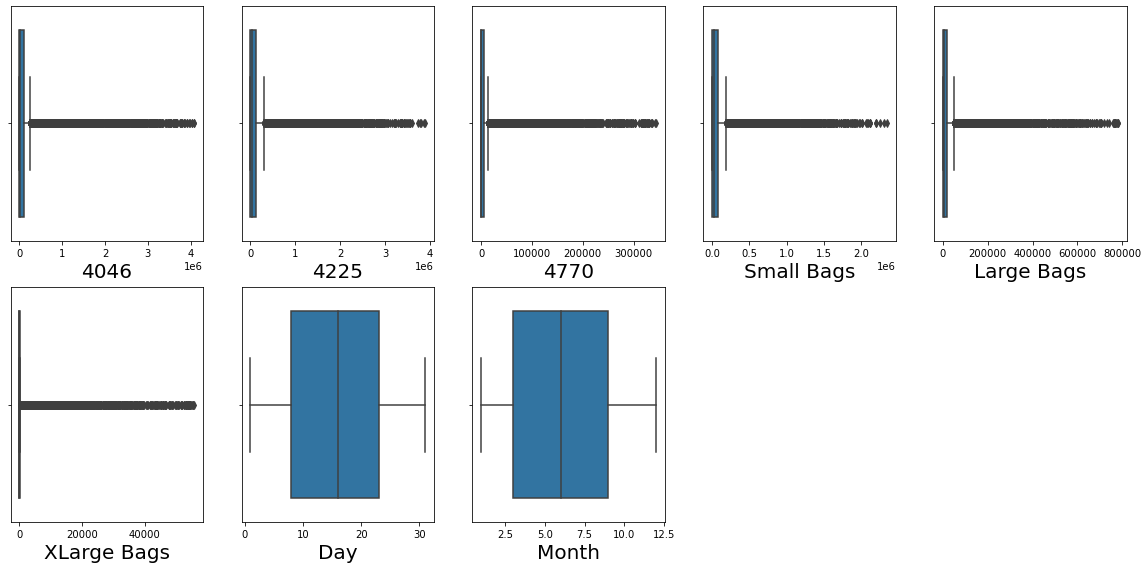

In [95]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in df.drop(columns = ['year','type','region','AveragePrice'],axis=1):
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

# skewness:

In [96]:
df.skew()

AveragePrice    0.560969
4046            4.928850
4225            4.472729
4770            5.137120
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Day             0.011251
Month           0.098217
dtype: float64

# Removing Skewness using yeo-johnson method

In [97]:
from sklearn.preprocessing import PowerTransformer

In [98]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson')

In [99]:
DF = df.drop(columns = ['year','type','region','AveragePrice'],axis=1)

In [113]:
transform  = power.fit_transform(DF)

In [114]:
transform = pd.DataFrame(transfrom,columns=DF.columns)

In [115]:
transform.skew()

4046          -0.015818
4225           0.004294
4770           0.026169
Small Bags     0.019905
Large Bags     0.015587
XLarge Bags    0.774360
Day           -0.038844
Month         -0.032311
dtype: float64

In [116]:
transform.index = df.index

In [117]:
Skewed = ['4046','4225','4770','Small Bags','Large Bags','XLarge Bags']

In [119]:
df[Skewed] = transform[Skewed]

In [120]:
df.skew()

AveragePrice    0.560969
4046           -0.015818
4225            0.004294
4770            0.026169
Small Bags      0.019905
Large Bags      0.015587
XLarge Bags     0.774360
year            0.220792
Day             0.011251
Month           0.098217
dtype: float64

#### Skewness has been removed from dataset

# Encoding:

In [121]:
type_dumm = pd.get_dummies(df[['type']],drop_first = False)

In [122]:
type_dumm

,type_conventional,type_organic
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
17777,0,1
17778,0,1
17779,0,1
17780,0,1


In [123]:
#joining to main dataset
df = df.join(type_dumm)

In [124]:
df.drop(columns=['type'],inplace=True)

In [125]:
df

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month,type_conventional,type_organic
0,1.33,-0.653168,0.348247,-0.211458,-0.345468,-0.789832,-0.688181,2015,Albany,27,12,1,0
1,1.35,-0.772216,0.265547,-0.163999,-0.309714,-0.780450,-0.688181,2015,Albany,20,12,1,0
2,0.93,-0.727091,0.650156,0.035375,-0.372226,-0.768495,-0.688181,2015,Albany,13,12,1,0
3,1.08,-0.628477,0.466989,-0.109835,-0.507188,-0.712352,-0.688181,2015,Albany,6,12,1,0
4,1.28,-0.680097,0.258097,-0.099145,-0.486987,-0.624897,-0.688181,2015,Albany,29,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,1.63,-0.458796,-0.923266,-1.225582,-0.175213,-0.438299,-0.688181,2018,WestTexNewMexico,4,2,0,1
17778,1.71,-0.613983,-0.671633,-1.225582,-0.330168,-0.508192,-0.688181,2018,WestTexNewMexico,28,1,0,1
17779,1.87,-0.613931,-0.778430,0.456238,-0.312125,-0.948869,-0.688181,2018,WestTexNewMexico,21,1,0,1
17780,1.93,-0.543343,-0.716793,0.455928,-0.249325,-0.916472,-0.688181,2018,WestTexNewMexico,14,1,0,1


# Label Encoding :

In [126]:
from sklearn.preprocessing import LabelEncoder

In [128]:
le = LabelEncoder()

In [130]:
df.region = le.fit_transform(df.region)

In [131]:
df

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month,type_conventional,type_organic
0,1.33,-0.653168,0.348247,-0.211458,-0.345468,-0.789832,-0.688181,2015,0,27,12,1,0
1,1.35,-0.772216,0.265547,-0.163999,-0.309714,-0.780450,-0.688181,2015,0,20,12,1,0
2,0.93,-0.727091,0.650156,0.035375,-0.372226,-0.768495,-0.688181,2015,0,13,12,1,0
3,1.08,-0.628477,0.466989,-0.109835,-0.507188,-0.712352,-0.688181,2015,0,6,12,1,0
4,1.28,-0.680097,0.258097,-0.099145,-0.486987,-0.624897,-0.688181,2015,0,29,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,1.63,-0.458796,-0.923266,-1.225582,-0.175213,-0.438299,-0.688181,2018,53,4,2,0,1
17778,1.71,-0.613983,-0.671633,-1.225582,-0.330168,-0.508192,-0.688181,2018,53,28,1,0,1
17779,1.87,-0.613931,-0.778430,0.456238,-0.312125,-0.948869,-0.688181,2018,53,21,1,0,1
17780,1.93,-0.543343,-0.716793,0.455928,-0.249325,-0.916472,-0.688181,2018,53,14,1,0,1


# Correlation:

In [132]:
df.corr()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month,type_conventional,type_organic
AveragePrice,1.000000,-0.549381,-0.449289,-0.491253,-0.493478,-0.478812,-0.393183,0.099910,0.010428,0.024742,0.157900,-0.608447,0.608447
4046,-0.549381,1.000000,0.765481,0.736882,0.781315,0.610040,0.575155,-0.002437,0.159477,-0.004601,-0.025892,0.726093,-0.726093
4225,-0.449289,0.765481,1.000000,0.797414,0.789730,0.619739,0.583027,-0.005237,0.031981,-0.006019,-0.024771,0.747733,-0.747733
4770,-0.491253,0.736882,0.797414,1.000000,0.754806,0.551455,0.615959,-0.051580,0.037908,0.001389,-0.017353,0.781037,-0.781037
Small Bags,-0.493478,0.781315,0.789730,0.754806,1.000000,0.576183,0.600891,0.184804,0.052880,-0.000422,-0.010396,0.719922,-0.719922
Large Bags,-0.478812,0.610040,0.619739,0.551455,0.576183,1.000000,0.453637,0.189696,0.089791,-0.001218,-0.017231,0.501890,-0.501890
XLarge Bags,-0.393183,0.575155,0.583027,0.615959,0.600891,0.453637,1.000000,0.154530,-0.016357,0.011273,0.021642,0.673459,-0.673459
year,0.099910,-0.002437,-0.005237,-0.051580,0.184804,0.189696,0.154530,1.000000,-0.003610,0.004044,-0.173166,-0.007399,0.007399
region,0.010428,0.159477,0.031981,0.037908,0.052880,0.089791,-0.016357,-0.003610,1.000000,0.000751,0.002175,-0.021970,0.021970
Day,0.024742,-0.004601,-0.006019,0.001389,-0.000422,-0.001218,0.011273,0.004044,0.000751,1.000000,0.010456,0.002469,-0.002469


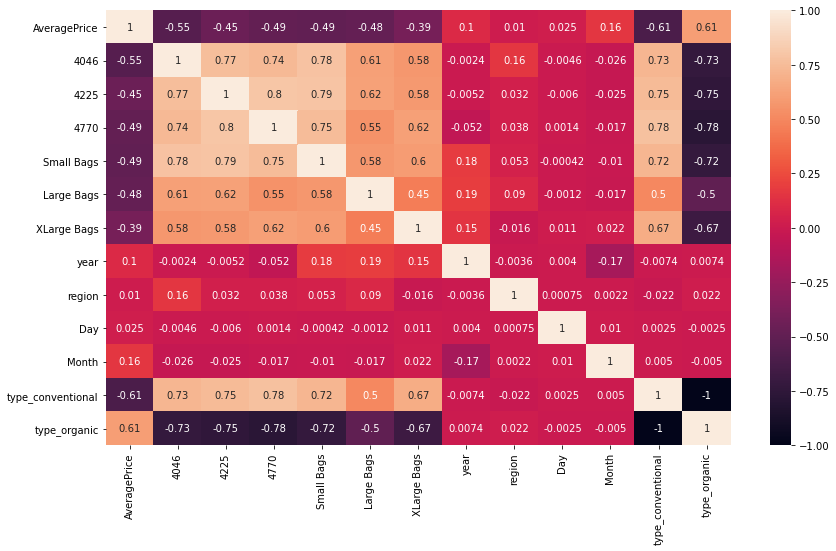

In [135]:
#visualize correlation using heatmap
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

##### From the above graph it is  observed that 'type_organic' has the highest positive correlation with 'AveragePrice'
##### 'type_conventional has highest negative coorelation '

# Scaling:

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
X = df.drop(columns=['AveragePrice'])
y = df['AveragePrice']

In [138]:
scaler= StandardScaler()

In [139]:
scaled_X = scaler.fit_transform(X)

# Selecting Features:

In [140]:
from sklearn.feature_selection import SelectKBest, f_classif

In [141]:
bf = SelectKBest(score_func = f_classif, k = 12)
fit = bf.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [142]:
fit = bf.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(22,'Score'))

              Feature      Score
11       type_organic  49.966168
10  type_conventional  49.966168
0                4046  36.646433
2                4770  27.640618
3          Small Bags  25.029697
4          Large Bags  23.501094
1                4225  21.804561
5         XLarge Bags  15.770087
6                year   3.163539
9               Month   2.850599
7              region   1.291093
8                 Day   1.249095


In [143]:
best_data = X.drop(columns=['region','Day'])

In [144]:
best_data

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,Month,type_conventional,type_organic
0,-0.653168,0.348247,-0.211458,-0.345468,-0.789832,-0.688181,2015,12,1,0
1,-0.772216,0.265547,-0.163999,-0.309714,-0.780450,-0.688181,2015,12,1,0
2,-0.727091,0.650156,0.035375,-0.372226,-0.768495,-0.688181,2015,12,1,0
3,-0.628477,0.466989,-0.109835,-0.507188,-0.712352,-0.688181,2015,12,1,0
4,-0.680097,0.258097,-0.099145,-0.486987,-0.624897,-0.688181,2015,11,1,0
...,...,...,...,...,...,...,...,...,...,...
17777,-0.458796,-0.923266,-1.225582,-0.175213,-0.438299,-0.688181,2018,2,0,1
17778,-0.613983,-0.671633,-1.225582,-0.330168,-0.508192,-0.688181,2018,1,0,1
17779,-0.613931,-0.778430,0.456238,-0.312125,-0.948869,-0.688181,2018,1,0,1
17780,-0.543343,-0.716793,0.455928,-0.249325,-0.916472,-0.688181,2018,1,0,1


In [145]:
best_fea = scaler.fit_transform(best_data)

# Model Building:

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error

In [148]:
x_train,x_test,y_train,y_test = train_test_split(best_fea,y,test_size=.31,random_state=11)

# RandomForestRegressor

In [150]:
rf =RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [151]:
rf.score(x_train,y_train)

0.9806073303813191

In [153]:
rf_pred = rf.predict(x_test)

In [156]:
print("r2_score:",r2_score(y_test,rf_pred))
print("MSE :",mean_squared_error(y_test,rf_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test,rf_pred)))

r2_score: 0.8747750290984108
MSE : 0.02041281145292944
RMSE : 0.1428734105875878


# DecisionTreeRegressor:

In [158]:
dtc = DecisionTreeRegressor()
dtc.fit(x_train,y_train)

DecisionTreeRegressor()

In [159]:
dtc.score(x_train,y_train)

1.0

In [160]:
dtc_pred = dtc.predict(x_test)

In [161]:
print("r2_score:",r2_score(y_test,dtc_pred))
print("MSE :",mean_squared_error(y_test,dtc_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test,dtc_pred)))

r2_score: 0.7277927307726173
MSE : 0.04437226555414475
RMSE : 0.21064725384904678


# SVR:

In [165]:
sv = SVR()
sv.fit(x_train,y_train)

SVR()

In [166]:
sv.score(x_train,y_train)

0.7738997176270968

In [167]:
sv_pred = sv.predict(x_test)

In [168]:
print("r2_score:",r2_score(y_test,sv_pred))
print("MSE :",mean_squared_error(y_test,sv_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test,sv_pred)))

r2_score: 0.7760907566979658
MSE : 0.03649924718037624
RMSE : 0.1910477615162665


# Ridge:

In [170]:
rd = Ridge()
rd.fit(x_train,y_train)

Ridge()

In [171]:
rd.score(x_train,y_train)

0.502340521993505

In [172]:
rd_pred = rd.predict(x_test)

In [173]:
print("r2_score:",r2_score(y_test,rd_pred))
print("MSE :",mean_squared_error(y_test,rd_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test,rd_pred)))

r2_score: 0.5140483550304833
MSE : 0.07921454668812992
RMSE : 0.28145078910553784


# Cross Validation:

In [177]:
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import ShuffleSplit

### Random Forest Classifier

In [179]:
print(cvs(rf,best_fea,y,cv=ShuffleSplit(5)).mean()) 

0.8782638146378148


### DecisionTreeClassifier

In [180]:
print(cvs(dtc,best_fea,y,cv=ShuffleSplit(5)).mean()) 

0.7346596935209071


# SVR:

In [181]:
print(cvs(sv,best_fea,y,cv=ShuffleSplit(5)).mean()) 

0.7645263118616128


### Ridge

In [182]:
print(cvs(rd,best_fea,y,cv=ShuffleSplit(5)).mean()) 

0.5032629792714856


# Based on r2 score and crossvalidation score  RandomForestClassifier is best model

# Hyper parameter tuning

# Random Forest Classifier

In [183]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],'min_samples_leaf':[5,10,20],'min_samples_split':[5,10],'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [184]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=2,n_jobs = -1,verbose = 1)

In [185]:
GridCV.fit(x_train,y_train)

Fitting 2 folds for each of 324 candidates, totalling 648 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10],
                         'n_estimators': [30, 60, 80]},
             verbose=1)

In [186]:
GridCV.best_params_

{'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 80}

In [187]:
ads_model = RandomForestRegressor(n_estimators = 60,criterion = 'mse', max_depth= 20, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 5)

In [188]:
ads_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=60)

In [190]:
random_fc = ads_model.predict(x_test)
acc = r2_score(y_test,random_fc)
print(acc*100)

85.04906852484696


## Random Forest Regressor has an accuracy of  84.88%

# Saving The Model

In [191]:
import joblib

In [192]:
joblib.dump(ads_model,"ADS_Avocado_model.pkl")

['ADS_Avocado_model.pkl']

# 2nd angle where Target is Region

In [193]:
df

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month,type_conventional,type_organic
0,1.33,-0.653168,0.348247,-0.211458,-0.345468,-0.789832,-0.688181,2015,0,27,12,1,0
1,1.35,-0.772216,0.265547,-0.163999,-0.309714,-0.780450,-0.688181,2015,0,20,12,1,0
2,0.93,-0.727091,0.650156,0.035375,-0.372226,-0.768495,-0.688181,2015,0,13,12,1,0
3,1.08,-0.628477,0.466989,-0.109835,-0.507188,-0.712352,-0.688181,2015,0,6,12,1,0
4,1.28,-0.680097,0.258097,-0.099145,-0.486987,-0.624897,-0.688181,2015,0,29,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,1.63,-0.458796,-0.923266,-1.225582,-0.175213,-0.438299,-0.688181,2018,53,4,2,0,1
17778,1.71,-0.613983,-0.671633,-1.225582,-0.330168,-0.508192,-0.688181,2018,53,28,1,0,1
17779,1.87,-0.613931,-0.778430,0.456238,-0.312125,-0.948869,-0.688181,2018,53,21,1,0,1
17780,1.93,-0.543343,-0.716793,0.455928,-0.249325,-0.916472,-0.688181,2018,53,14,1,0,1


# This is Classification problem,Since the Target variable is categorical type of Data

In [194]:
df.shape

(17782, 13)

In [195]:
df['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       52, 53, 51])

In [196]:
df['region'].value_counts()

0     338
42    338
23    338
39    338
8     338
24    338
40    338
9     338
41    338
10    338
26    338
11    338
38    338
27    338
43    338
12    338
28    338
44    338
13    338
14    338
30    338
31    338
16    338
7     338
50    338
19    338
32    338
48    338
1     338
17    338
33    338
49    338
2     338
18    338
34    338
3     338
47    338
35    338
20    338
37    338
21    338
36    338
5     338
4     338
53    335
25    333
22    331
29    325
46    307
45    292
6     290
15    272
52    256
51    169
Name: region, dtype: int64

In [197]:
df['region'].dtype

dtype('int32')

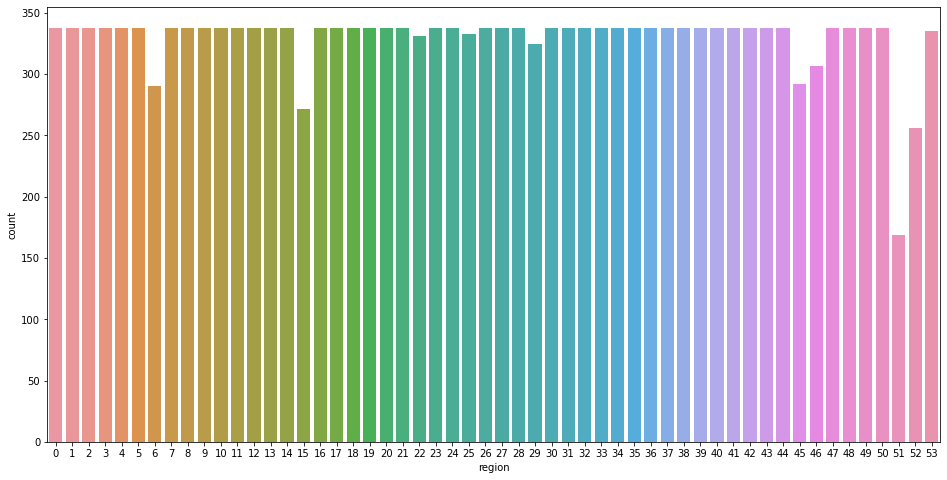

In [201]:
#visualize
plt.figure(figsize=(16,8))
sns.countplot(df['region'])
plt.show()

In [202]:
df.describe()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month,type_conventional,type_organic
count,17782.000000,1.778200e+04,1.778200e+04,1.778200e+04,1.778200e+04,1.778200e+04,1.778200e+04,17782.000000,17782.000000,17782.000000,17782.000000,17782.000000,17782.000000
mean,1.415546,2.831659e-15,-1.649513e-15,-2.508275e-14,7.314286e-16,-1.330395e-15,-2.392268e-15,2016.141098,26.161624,15.683613,6.194298,0.486953,0.513047
std,0.402278,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,1.000028e+00,0.939273,15.402194,8.777845,3.537070,0.499844,0.499844
min,0.440000,-2.268391e+00,-2.542472e+00,-1.225582e+00,-2.658507e+00,-1.568037e+00,-6.881813e-01,2015.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.110000,-7.237719e-01,-7.280161e-01,-1.225582e+00,-7.869861e-01,-7.566665e-01,-6.881813e-01,2015.000000,13.000000,8.000000,3.000000,0.000000,0.000000
50%,1.380000,-6.524856e-02,4.906980e-02,8.303015e-02,8.637182e-02,3.418380e-02,-6.881813e-01,2016.000000,26.000000,16.000000,6.000000,0.000000,1.000000
75%,1.670000,8.021915e-01,7.192297e-01,9.247680e-01,6.490198e-01,7.413220e-01,1.426907e+00,2017.000000,39.000000,23.000000,9.000000,1.000000,1.000000
max,3.250000,2.320455e+00,2.550726e+00,1.883078e+00,2.753092e+00,2.511572e+00,1.527256e+00,2018.000000,53.000000,31.000000,12.000000,1.000000,1.000000


# Correlation:

In [203]:
df.corr()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month,type_conventional,type_organic
AveragePrice,1.000000,-0.549381,-0.449289,-0.491253,-0.493478,-0.478812,-0.393183,0.099910,0.010428,0.024742,0.157900,-0.608447,0.608447
4046,-0.549381,1.000000,0.765481,0.736882,0.781315,0.610040,0.575155,-0.002437,0.159477,-0.004601,-0.025892,0.726093,-0.726093
4225,-0.449289,0.765481,1.000000,0.797414,0.789730,0.619739,0.583027,-0.005237,0.031981,-0.006019,-0.024771,0.747733,-0.747733
4770,-0.491253,0.736882,0.797414,1.000000,0.754806,0.551455,0.615959,-0.051580,0.037908,0.001389,-0.017353,0.781037,-0.781037
Small Bags,-0.493478,0.781315,0.789730,0.754806,1.000000,0.576183,0.600891,0.184804,0.052880,-0.000422,-0.010396,0.719922,-0.719922
Large Bags,-0.478812,0.610040,0.619739,0.551455,0.576183,1.000000,0.453637,0.189696,0.089791,-0.001218,-0.017231,0.501890,-0.501890
XLarge Bags,-0.393183,0.575155,0.583027,0.615959,0.600891,0.453637,1.000000,0.154530,-0.016357,0.011273,0.021642,0.673459,-0.673459
year,0.099910,-0.002437,-0.005237,-0.051580,0.184804,0.189696,0.154530,1.000000,-0.003610,0.004044,-0.173166,-0.007399,0.007399
region,0.010428,0.159477,0.031981,0.037908,0.052880,0.089791,-0.016357,-0.003610,1.000000,0.000751,0.002175,-0.021970,0.021970
Day,0.024742,-0.004601,-0.006019,0.001389,-0.000422,-0.001218,0.011273,0.004044,0.000751,1.000000,0.010456,0.002469,-0.002469


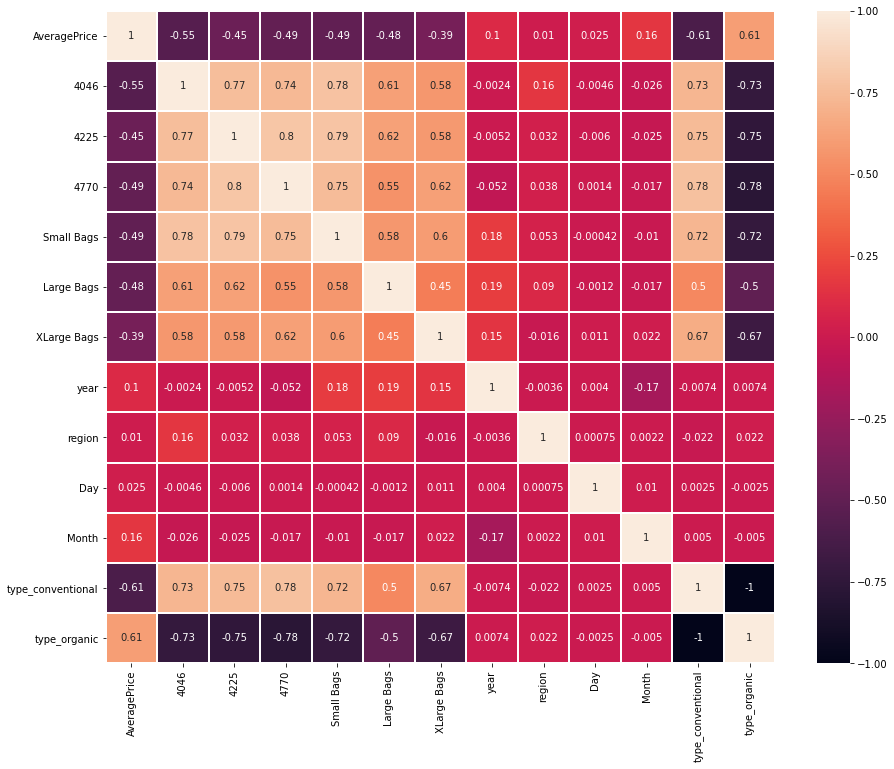

In [205]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,linewidth=1)
plt.show()

### from the above graph ,column '4046','Large bags','Small bags' is highly correlated with region 
### columns 'Xlarge bags', 'type_conventional' are highly negative correlation with region

In [207]:
df

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month,type_conventional,type_organic
0,1.33,-0.653168,0.348247,-0.211458,-0.345468,-0.789832,-0.688181,2015,0,27,12,1,0
1,1.35,-0.772216,0.265547,-0.163999,-0.309714,-0.780450,-0.688181,2015,0,20,12,1,0
2,0.93,-0.727091,0.650156,0.035375,-0.372226,-0.768495,-0.688181,2015,0,13,12,1,0
3,1.08,-0.628477,0.466989,-0.109835,-0.507188,-0.712352,-0.688181,2015,0,6,12,1,0
4,1.28,-0.680097,0.258097,-0.099145,-0.486987,-0.624897,-0.688181,2015,0,29,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,1.63,-0.458796,-0.923266,-1.225582,-0.175213,-0.438299,-0.688181,2018,53,4,2,0,1
17778,1.71,-0.613983,-0.671633,-1.225582,-0.330168,-0.508192,-0.688181,2018,53,28,1,0,1
17779,1.87,-0.613931,-0.778430,0.456238,-0.312125,-0.948869,-0.688181,2018,53,21,1,0,1
17780,1.93,-0.543343,-0.716793,0.455928,-0.249325,-0.916472,-0.688181,2018,53,14,1,0,1


In [208]:
X = df.drop(columns = ['region'])
y = df['region']

# scaling:

In [209]:
from sklearn.preprocessing import StandardScaler

In [210]:
scaler = StandardScaler()

In [211]:
scaled_x = scaler.fit_transform(X)

In [212]:
scaled_x

array([[-0.21266011, -0.65316815,  0.34824745, ...,  1.64143354,
         1.02644331, -1.02644331],
       [-0.16294184, -0.77221574,  0.26554691, ...,  1.64143354,
         1.02644331, -1.02644331],
       [-1.20702555, -0.72709129,  0.65015553, ...,  1.64143354,
         1.02644331, -1.02644331],
       ...,
       [ 1.12973323, -0.61393125, -0.77842993, ..., -1.4685724 ,
        -0.97423793,  0.97423793],
       [ 1.27888805, -0.54334343, -0.71679326, ..., -1.4685724 ,
        -0.97423793,  0.97423793],
       [ 0.50825483, -0.35681235, -0.79099921, ..., -1.4685724 ,
        -0.97423793,  0.97423793]])

# Principle Component Analysis

In [213]:
from sklearn.decomposition import PCA

In [214]:
pca = PCA()

In [215]:
pca_df = pca.fit_transform(scaled_x)

In [216]:
pca_df

array([[ 3.26338924e-02, -2.30772404e+00, -1.12544742e+00, ...,
         6.35676567e-01,  1.08033630e-01, -6.85711613e-17],
       [-1.86909943e-02, -2.29377047e+00, -5.42242062e-01, ...,
         5.98069162e-01, -2.07264852e-03, -9.95712032e-17],
       [ 4.63626701e-01, -2.36873784e+00,  3.80847756e-01, ...,
         7.32530310e-01,  5.09357467e-01, -1.08222110e-16],
       ...,
       [-1.86164179e+00,  2.32840309e+00, -5.11816510e-01, ...,
        -9.62284637e-01,  2.53720794e-01, -1.59023439e-17],
       [-1.82340747e+00,  2.34963640e+00,  3.55646777e-02, ...,
        -9.48816152e-01,  2.14942341e-01,  1.95856625e-17],
       [-1.70035961e+00,  2.32491628e+00,  8.87463988e-01, ...,
        -8.12921378e-01,  3.51356854e-01,  2.63987617e-17]])

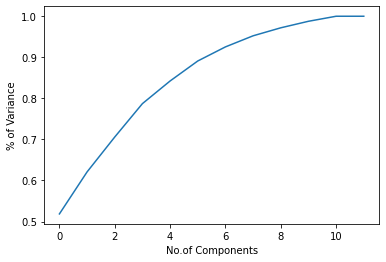

In [218]:
#visualize PCA
plt.plot()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No.of Components')
plt.ylabel('% of Variance')
plt.show()

# 95% data is explained by 10 components

In [219]:
#creating pca data
pca = PCA(n_components=10)

In [220]:
new_pca = pca.fit_transform(scaled_X)
pca_x = pd.DataFrame(new_pca,columns=np.arange(10))

In [221]:
pca_x

,0,1,2,3,4,5,6,7,8,9
0,-0.062805,-2.444997,-1.797009,1.218627,-0.226829,0.085112,0.670042,-1.035613,-0.119909,-0.585658
1,-0.103461,-2.428608,-1.787422,0.429926,-0.332252,0.131375,0.645462,-1.056399,-0.204782,-0.528077
2,0.108562,-2.455745,-1.742808,-0.371711,-0.368876,0.047095,0.699430,-0.970865,-0.424731,-0.647190
3,-0.009963,-2.428846,-1.694995,-1.158489,-0.482770,0.074223,0.571966,-1.070242,-0.227182,-0.573554
4,-0.066768,-2.272498,-1.815567,1.422707,0.009597,0.004485,0.491768,-1.134193,-0.190895,-0.447252
...,...,...,...,...,...,...,...,...,...,...
17777,-1.992379,2.551912,1.589794,-1.203513,-0.277558,0.682081,0.445655,-0.067452,0.242882,-0.120954
17778,-2.029449,2.644054,1.428538,1.478883,0.296970,0.636484,0.434672,-0.073722,0.051541,-0.346065
17779,-1.571137,2.411589,1.387208,0.659312,0.474186,0.909725,0.817173,0.298998,-0.928258,0.799830
17780,-1.491109,2.431424,1.436490,-0.132574,0.379288,0.879811,0.840157,0.334764,-0.893920,0.776189


# Selecting Best Features:

In [222]:
from sklearn.feature_selection import SelectKBest, f_classif

In [223]:
sb = SelectKBest()

In [225]:
fea_sb = sb.fit(X,y)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([columns,scores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(11,'Score'))

              Feature      Score
11       type_organic  49.966168
10  type_conventional  49.966168
0        AveragePrice  36.646433
2                4225  27.640618
3                4770  25.029697
4          Small Bags  23.501094
1                4046  21.804561
5          Large Bags  15.770087
6         XLarge Bags   3.163539
9               Month   2.850599
7                year   1.291093


# Dropping columns 'Month' and 'year'

In [226]:
x_df = df.drop(columns=['year','Month'])

In [227]:
x_df

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,region,Day,type_conventional,type_organic
0,1.33,-0.653168,0.348247,-0.211458,-0.345468,-0.789832,-0.688181,0,27,1,0
1,1.35,-0.772216,0.265547,-0.163999,-0.309714,-0.780450,-0.688181,0,20,1,0
2,0.93,-0.727091,0.650156,0.035375,-0.372226,-0.768495,-0.688181,0,13,1,0
3,1.08,-0.628477,0.466989,-0.109835,-0.507188,-0.712352,-0.688181,0,6,1,0
4,1.28,-0.680097,0.258097,-0.099145,-0.486987,-0.624897,-0.688181,0,29,1,0
...,...,...,...,...,...,...,...,...,...,...,...
17777,1.63,-0.458796,-0.923266,-1.225582,-0.175213,-0.438299,-0.688181,53,4,0,1
17778,1.71,-0.613983,-0.671633,-1.225582,-0.330168,-0.508192,-0.688181,53,28,0,1
17779,1.87,-0.613931,-0.778430,0.456238,-0.312125,-0.948869,-0.688181,53,21,0,1
17780,1.93,-0.543343,-0.716793,0.455928,-0.249325,-0.916472,-0.688181,53,14,0,1


In [229]:
x_scaled = scaler.fit_transform(x_df)

# Model Building:

In [295]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import auc

In [296]:
x_train,x_test,y_train,y_test  =train_test_split(x_scaled,y,test_size=.22,random_state=27)

In [297]:
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier()
ab = AdaBoostClassifier()
knn = KNeighborsClassifier()
lr = LogisticRegression()

In [298]:
models = [dtc,rf,ab,knn,lr]

In [299]:
Model = []
score = []
cvs = []
rocscore = []

## DecisionTreeClassifier()

In [301]:
for model in models:
    print ('******************', model , '*********************')
    print ("\n")
    
    
    
    
    Model.append(model)
    model.fit (x_train, y_train)
    print (model)
    
    pre = model.predict(x_test)
    print ('\n')
    
    AS = accuracy_score(y_test, pre)
    print ("Accuracy score: ", AS)
    score.append (AS*100)
    print ('\n')
    
    sc = cross_val_score(model, x_scaled, y, cv =10, scoring='accuracy').mean()
    print ("cross val score: ", sc)    
    cvs.append(sc*100)
    print ('\n')
    
    fpr, tpr, thresholds = roc_curve(y_test, pre, pos_label=1)
    roc_auc = auc(fpr, tpr)
    print ("roc auc score: ", roc_auc)
    rocscore.append(roc_auc * 100)
    print ('\n')
    
    print ("classification report: ", classification_report (y_test, pre) )
    print ('\n')
    
    cm = confusion_matrix(y_test, pre)
    print (cm)
    print ('\n')

****************** DecisionTreeClassifier() *********************


DecisionTreeClassifier()


Accuracy score:  1.0


cross val score:  1.0


roc auc score:  0.02456232035536976


classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00        73
           3       1.00      1.00      1.00        69
           4       1.00      1.00      1.00        92
           5       1.00      1.00      1.00        76
           6       1.00      1.00      1.00        61
           7       1.00      1.00      1.00        79
           8       1.00      1.00      1.00        74
           9       1.00      1.00      1.00        63
          10       1.00      1.00      1.00        70
          11       1.00      1.00      1.00        72
          12       1.00      1.00      1.00        80
          13       1.00      1.00      

# RandomForestClassifier is best model for this Dataset

# Hyper Parameter Tuning:

#### RandomForestClassifier

In [307]:
parameters = { 'n_estimators': [100,200,300,500,1000], 'criterion': ['gini', 'entropy'], 'max_features':
              ['auto', 'sqrt', 'log2']}

In [309]:
GridCV = GridSearchCV(estimator = rf, param_grid = parameters, cv=2)

In [311]:
GridCV.fit(x_scaled,y)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 500, 1000]})

In [312]:
GridCV.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}

In [313]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=79, test_size = 0.20)
rf = RandomForestClassifier(criterion= 'gini', max_features='log2', n_estimators= 100)
rf.fit(x_train, y_train)
y_pred =  rf.predict(x_test)
print (y_pred)

[20 10  5 ... 36 50 12]


In [314]:
print ("accuracy score: ", accuracy_score(y_test, y_pred))
print ("Classification Report : \n", classification_report (y_test, y_pred))
print ("Confusion_matrix: ", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

accuracy score:  0.9966263705369693
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        79
           3       1.00      1.00      1.00        69
           4       1.00      1.00      1.00        74
           5       1.00      1.00      1.00        76
           6       1.00      1.00      1.00        51
           7       0.99      1.00      0.99        76
           8       1.00      1.00      1.00        75
           9       1.00      0.99      0.99        68
          10       1.00      1.00      1.00        62
          11       1.00      1.00      1.00        71
          12       1.00      1.00      1.00        72
          13       1.00      1.00      1.00        75
          14       0.99      1.00      0.99        76
          15       1.00      1.00      1.00        52
          16       

# saving

In [323]:
import joblib
joblib.dump(rf, 'ADS_projectavocado.pkl')

['ADS_projectavocado.pkl']